In [254]:
######## pip install -U sklearn

from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [255]:
# loading the dataset
data = pd.read_csv('AB_NYC_2019.csv')

In [256]:
# types of the variables
data.dtypes    

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [257]:
# checking NA's values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [258]:
# replacing NA's values
data["name"].fillna("NoAnswer", inplace = True)
data["host_name"].fillna("NoAnswer", inplace = True)
data["last_review"].fillna("NoAnswer", inplace = True)
data["reviews_per_month"].fillna(0, inplace = True)

In [259]:
# price
data["price"].describe() 

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

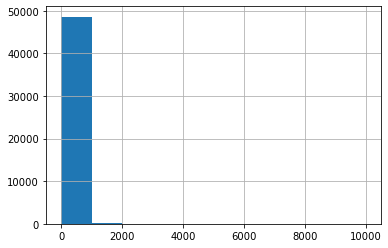

In [260]:
# distribution of price
hist1 = data["price"].hist()
plt.show(hist1)

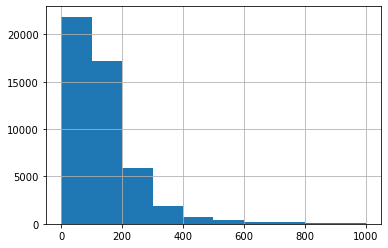

In [261]:
# plot histogram for prices less than $1000
hist2 = data["price"][data["price"]<1000].hist()
plt.show(hist2)

In [262]:
data[data["price"]>1000]

# 239 listings have price per day > 1000. We will treat them as outliers and drop them

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NoAnswer,0.00,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NoAnswer,0.00,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,NoAnswer,0.00,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NoAnswer,0.00,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NoAnswer,0.00,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NoAnswer,0.00,1,349


In [263]:
data=data[data["price"]<1000]
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NoAnswer,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NoAnswer,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NoAnswer,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NoAnswer,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NoAnswer,0.00,6,2


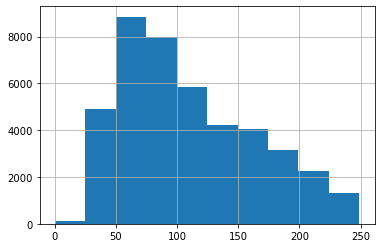

In [264]:
# Gaussian distribution here
hist_price=data["price"][data["price"]<250].hist()

In [265]:
# 250 as threshold price 
data=data[data["price"]<250]

In [266]:
# looking at the price column again
data["price"].describe() 

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [267]:
# neighbourhood groups
data['neighbourhood_group'].value_counts()

# there are five major neighbourhood groups in NYC with Manhattan and Brooklyn accounting for 85% of the listings

Brooklyn         18581
Manhattan        17270
Queens            5413
Bronx             1052
Staten Island      353
Name: neighbourhood_group, dtype: int64

In [268]:
# average listing price by neighbourhood group
ng_price=data.groupby("neighbourhood_group")["price"].mean()

In [269]:
# Manhattan is most expensive and Bronx is the least expensive place to live
ng_price

neighbourhood_group
Bronx             73.796578
Brooklyn          98.068134
Manhattan        128.670990
Queens            83.639941
Staten Island     82.606232
Name: price, dtype: float64

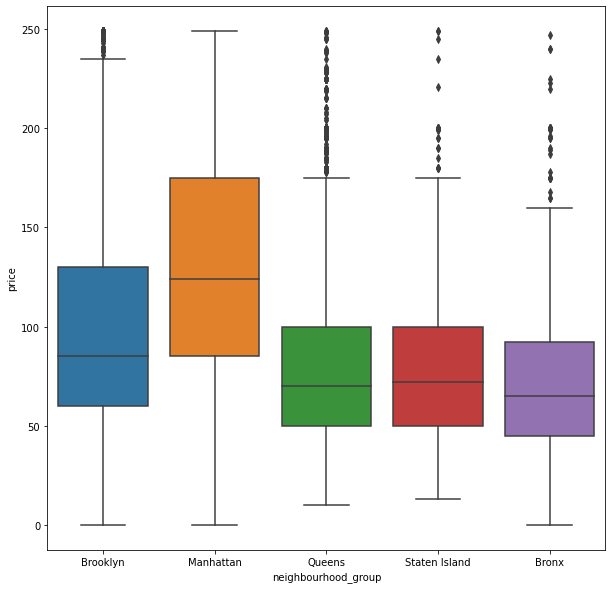

In [270]:
# distributuion of price and neighbourhood group
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='price')

Here we can note that Brooklyn and Manhattan tend to have more listings with price > 100.

In [271]:
# checking if there are duplicate host_ids and the maximum number per host_id
df = data.groupby(["host_id"])
max(df.size())

238

In [272]:
# finding the host_id with maximum listings
host_id_counts = data["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

219517861

In [273]:
# Sonder(NYC) has the max number of listings
data[data["host_id"]==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39771,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,2019-06-08,0.94,327,137
39772,30937595,Sonder | 11th Ave | Bright 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,2019-06-20,1.00,327,281
39773,30937596,Sonder | 11th Ave | Contemporary 1BR + Gym,219517861,Sonder (NYC),Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,2019-06-10,1.00,327,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47686,35869234,Sonder | 116 John | Classic 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70852,-74.00510,Entire home/apt,198,29,0,NoAnswer,0.00,327,345
47687,35869466,Sonder | 116 John | Classic Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70802,-74.00642,Entire home/apt,180,29,0,NoAnswer,0.00,327,338
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NoAnswer,0.00,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NoAnswer,0.00,327,342


In [274]:
# drop columns that are not necessary for our analysis
data = data.drop(columns = ["id","host_name"])

In [275]:
# listing name column
data["name_length"]=data['name'].map(str).apply(len)

In [276]:
# Max and Min name length
print(data["name_length"].max())
print(data["name_length"].min())
print(data["name_length"].idxmax())
print(data["name_length"].idxmin())

179
1
25832
4033


In [277]:
# Max name 
data.at[25832, 'name']

'The printing studio bedroom with garden in Bedstuy  !!Brooklyn. Historic neighborhood close to everything ! Full kitchen bathroom BBQ and porch at your disposal. Learn to print !!'

<AxesSubplot:xlabel='name_length', ylabel='number_of_reviews'>

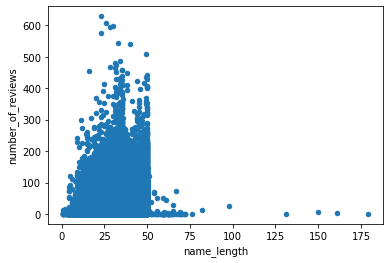

In [278]:
#if name length has an impact on how much it is noticed. We can assume higher number of reviews mean more people lived there and hence more people "noticed" the listing
data["name_length"].corr(data["number_of_reviews"])
data.plot.scatter(x="name_length", y ="number_of_reviews" )

0.05631852209796641

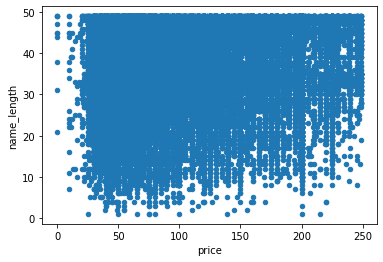

In [279]:
# there is hardly any relationship there. Lets see between price and name length 
data[data["name_length"]<50].plot.scatter(x="price", y ="name_length")
data["name_length"].corr(data["price"])

In [280]:
# room_type variable
data['room_type'].value_counts()
# most listings are either Entire home or Private room

Private room       21753
Entire home/apt    19790
Shared room         1126
Name: room_type, dtype: int64

In [281]:
# average price per room_type
rt_price = data.groupby("room_type")["price"].mean()

In [282]:
# Entire room has the highest price and shared room has lowest avg price which makes sense
rt_price

room_type
Entire home/apt    144.977211
Private room        76.802832
Shared room         56.925400
Name: price, dtype: float64

In [283]:
# after analysis, I have decided to drop these columns as they will not be useful in prediction
data.drop(["name",'last_review',"latitude",'longitude'], axis=1, inplace=True)

In [284]:
data.drop(["host_id"], axis=1, inplace=True)

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

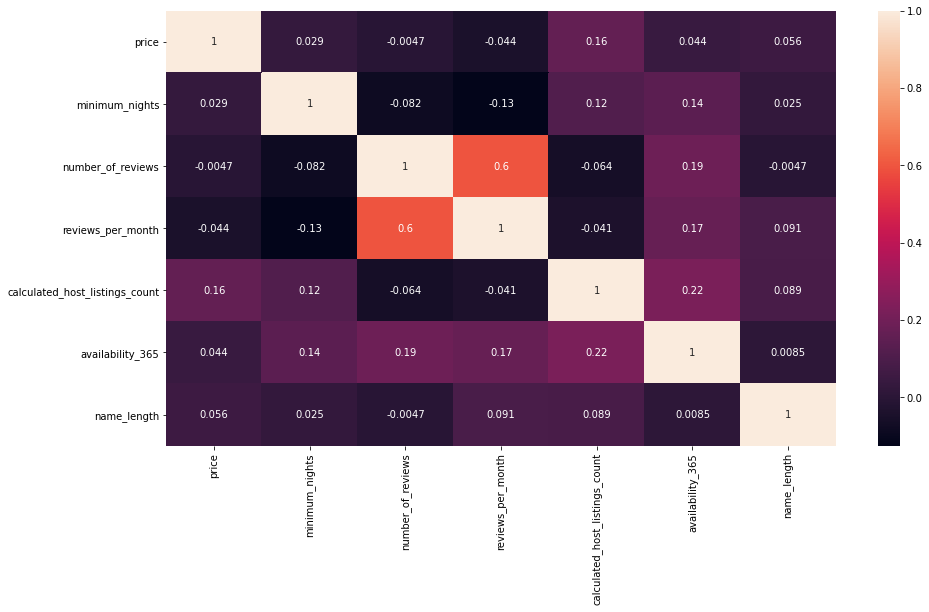

In [285]:
# correlation matrix 
corr = data.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

Let us start with basic Linear Regression to create a base line model


In [286]:
dataset_one = pd.get_dummies(data, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
dataset_one.drop(["neighbourhood"], axis=1, inplace=True)

In [287]:
X = dataset_one.iloc[:, dataset_one.columns != 'price']
Y = dataset_one["price"]

Splitting into training and testing data

In [288]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [289]:
reg = LinearRegression().fit(x_train, y_train)
score = reg.score(x_train, y_train)
reg.coef_

array([-1.58535114e-01, -1.66607663e-03, -9.85903661e-01,  1.08149056e-01,
        3.67759458e-02,  1.73901982e-01,  1.84373412e+01,  4.19526963e+01,
        9.33776535e+00, -2.85165426e+00, -6.45422451e+01, -8.64032590e+01])

In [290]:
score

0.4953301955713837

In [291]:
# predicting
pred = reg.predict(x_train)

In [292]:
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train.columns
Coeff1["Coefficient"]=reg.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
11,rt_Shared room,-86.403259
10,rt_Private room,-64.542245
9,ng_Staten Island,-2.851654
2,reviews_per_month,-0.985904
0,minimum_nights,-0.158535
1,number_of_reviews,-0.001666
4,availability_365,0.036776
3,calculated_host_listings_count,0.108149
5,name_length,0.173902
8,ng_Queens,9.337765


In [293]:
# estimates
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2791.
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        18:05:01   Log-Likelihood:            -1.7275e+05
No. Observations:               34135   AIC:                         3.455e+05
Df Residuals:                   34122   BIC:                         3.456e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Model Interpretation

- We first look at the Adjusted R square value since this is a Multiple linear regression. It tell us that our independent variables can explain 49.5% of variations in our dependent variable, which is price.

- The constant or the y intercept has a value of 108.08. This means that putting all other x variables at 0, an Entire Apt/Home in Bronx will have a predicted price of 108.08. Remember when we created dummy variables we dropped one dummy from each column which we use as reference.

- Let's now look at the coefficients. We can interpret coefficient of minimum night as: With everything else being constant, with every one unit increase in minimum number of nights, the predicted price decreases by 0.1585.